In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import time
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import random
import math
import operator
from functools import reduce
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable
def create_dataset(n=1250, nf=2, nr=0, ni=2, random_state=125):
    '''
    generate a new dataset with 
    n: total number of samples
    nf: number of features
    nr: number of redundant features (these are linear combinatins of informative features)
    ni: number of informative features (ni + nr = nf must hold)
    random_state: set for reproducibility
    '''
    X, y = make_classification( n_samples=n,
                                n_features=nf,
                                n_redundant=nr,
                                n_informative=ni,
                                random_state=random_state,
                                n_clusters_per_class=2)
    rng = np.random.RandomState(2)
    X += 3 * rng.uniform(size = X.shape)
    X = StandardScaler().fit_transform(X)
    return X, y

In [3]:
def plotter(classifier, X, X_test, y_test, title, ax=None):
    # plot decision boundary for given classifier
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                            np.arange(y_min, y_max, plot_step)) 
    Z = classifier.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax:
        ax.contourf(xx, yy, Z, cmap = plt.cm.Paired)
        ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
        ax.set_title(title)
    else:
        plt.contourf(xx, yy, Z, cmap = plt.cm.Paired)
        plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
        plt.title(title)

q1 (a)

C:\Users\Olson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


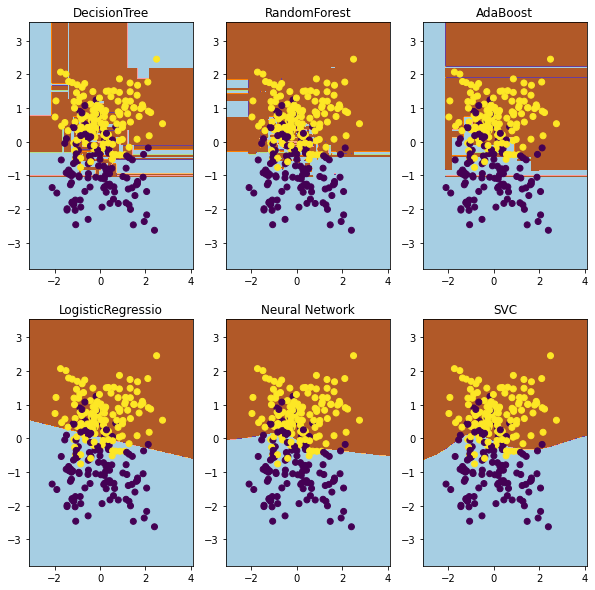

In [4]:
X,y = create_dataset() 
clfdic = dict()
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state = 45)
clf_DEC = DecisionTreeClassifier()
clf_DEC = clf_DEC.fit(train_X,train_y)
clfdic["DecisionTree"] = clf_DEC
clf_RAN = RandomForestClassifier()
clf_RAN = clf_RAN.fit(train_X, train_y)
clfdic["RandomForest"] = clf_RAN
clf_ADA = AdaBoostClassifier()
clf_ADA = clf_ADA.fit(train_X, train_y)
clfdic["AdaBoost"] = clf_ADA
clf_LOG = LogisticRegression()
clf_LOG = clf_LOG.fit(train_X, train_y)
clfdic["LogisticRegressio"] = clf_LOG
clf_NEU = MLPClassifier()
clf_NEU = clf_NEU.fit(train_X, train_y)
clfdic["Neural Network"] = clf_NEU
clf_SVC = SVC()
clf_SVC = clf_SVC.fit(train_X, train_y)
clfdic["SVC"] = clf_SVC
fig, ax = plt.subplots(2,3, figsize=(10,10))
i = 0
for key,value in clfdic.items():
    plotter(value, X, test_X, test_y, key, ax.flat[i])
    i=i+1

q1(b&c)

C:\Users\Olson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Olson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Olson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Olson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

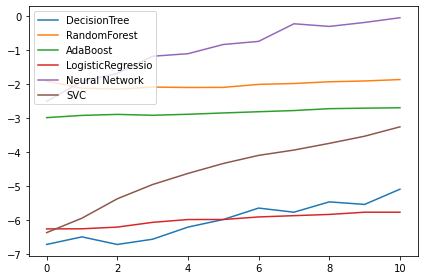

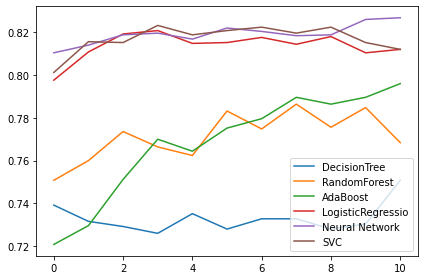

In [5]:
numset = [50,100,200,300,400,500,600,700,800,900,1000]
total = 0
pointdic = dict()
timedic = dict()
for key,value in clfdic.items():
    pointdic[key] = []
    timedic[key] = []
    for num in numset:
        start = time.time() 
        for i in range (10): 
            sample_x = [[] for i in range(len(train_X))]
            sample_list = [i for i in range(len(train_X))]
            sample_list = random.sample(sample_list, num)
            sample_x = [train_X[i] for i in sample_list]
            sample_y = [train_y[i] for i in sample_list]
            value.fit(sample_x,sample_y)
            y_pred = value.predict(test_X)
            total += accuracy_score(test_y,y_pred)
            #calculate accuracy at here 
            #todo
        end = time.time()
        running_time = end-start
        timedic[key].append(math.log(running_time/10))
        pointdic[key].append(total/10)
        total = 0
#plt.gca().get_color_cycle(['blue','orange','green','salmon','red','yellow'])
for key,value in timedic.items():
    plt.plot(value,label = key)
plt.legend(loc = 'upper left' )
plt.tight_layout() # plot formatting
plt.show()
for key,value in pointdic.items():
    plt.plot(value,label = key)
plt.legend(loc = 'lower right' )
plt.tight_layout() # plot formatting
plt.show()

q1_ d


In [4]:
X,y = create_dataset(n = 2000,nf = 20,nr=12,ni = 8,random_state = 25)
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.5,random_state = 15)
clf_DEC = DecisionTreeClassifier(random_state=0)
clf_DEC = clf_DEC.fit(train_X,train_y)
y_pred = clf_DEC.predict(test_X)
print("test_acc: ",accuracy_score(test_y,y_pred))
y_pred = clf_DEC.predict(train_X)
print("train_acc: ",accuracy_score(train_y,y_pred))

test_acc:  0.814
train_acc:  1.0


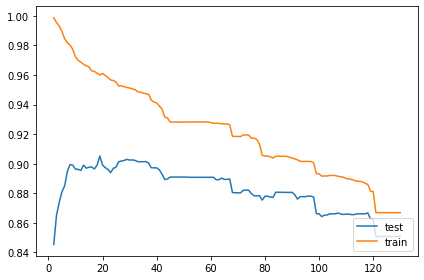

In [16]:
listtest = []
listtrain = []
for i in range(2,131):
    clf_DEC = DecisionTreeClassifier(min_samples_leaf=i,random_state= 0 )
    clf_DEC = clf_DEC.fit(train_X,train_y)
    y_pred = clf_DEC.predict_proba(test_X)
    listtest.append(roc_auc_score(test_y, y_pred[:,1]))
    y_pred = clf_DEC.predict_proba(train_X)
    
    listtrain.append(roc_auc_score(train_y, y_pred[:,1]))
plt.plot([i for i in range(2,131)],listtest,label = "test")
plt.plot([i for i in range(2,131)],listtrain,label = "train")
plt.legend(loc = 'lower right' )
plt.tight_layout() # plot formatting
plt.show()


the value of k that results in the highest average CV score is  24
test_acc:  0.825
train_acc:  0.881


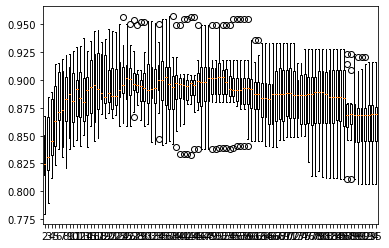

In [12]:
highestk = 0
best = 0
tenfolds_x = np.array_split(train_X,10)
tenfolds_y = np.array_split(train_y,10)
box = [[] for i in range(94)]
for i in range(2,96):
    for j in range (10):
        test_X_f = tenfolds_x[j]
        test_y_f = tenfolds_y[j]
        #add 9 sets together
        train_X_f = tenfolds_x[:j]
        train_X_f.extend(tenfolds_x[j+1:])
        nine_x = np.reshape(train_X_f,(-1,20))
        #add 9 sets together
        train_y_f = tenfolds_y[:j]
        train_y_f.extend(tenfolds_y[j+1:])
        nine_y = list(np.array(train_y_f).flatten())
        #fit
        clf_DEC = DecisionTreeClassifier(min_samples_leaf=i,random_state = 0)
        clf_DEC = clf_DEC.fit(nine_x,nine_y)
        y_pred = clf_DEC.predict_proba(test_X_f)
        box[i-2].append(roc_auc_score(test_y_f,y_pred[:,1]))
for i in range(94):
    if sum(box[i]) > best:
        best = sum(box[i])
        highestk = i+2
print("the value of k that results in the highest average CV score is ",highestk)
clf_DEC = DecisionTreeClassifier(min_samples_leaf = highestk,random_state = 0)
clf_DEC = clf_DEC.fit(train_X,train_y)
y_pred = clf_DEC.predict(test_X)
print("test_acc: ",accuracy_score(test_y,y_pred))
y_pred = clf_DEC.predict(train_X)
print("train_acc: ",accuracy_score(train_y,y_pred))
plt.boxplot(box,positions = [i for i in range(2,96)])
plt.show()

In [23]:
g_dic=dict()
clf_DEC = DecisionTreeClassifier(random_state = 0)
g_dic["min_samples_leaf"] = [i for i in range(2,96)]
clf = GridSearchCV(clf_DEC,g_dic,scoring = 'roc_auc',cv = 10)
clf.fit(train_X, train_y)
clf.best_estimator_

DecisionTreeClassifier(min_samples_leaf=28, random_state=0)

In [24]:
clf_DEC = DecisionTreeClassifier(min_samples_leaf = 28,random_state = 0)
clf_DEC = clf_DEC.fit(train_X,train_y)
y_pred = clf_DEC.predict(test_X)
print("test_acc: ",accuracy_score(test_y,y_pred))
y_pred = clf_DEC.predict(train_X)
print("train_acc: ",accuracy_score(train_y,y_pred))

test_acc:  0.828
train_acc:  0.878


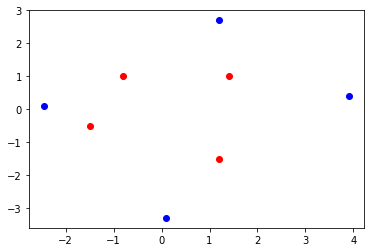

In [3]:
x1 = [-0.8,3.9,1.4,0.1,1.2,-2.45,-1.5,1.2]
x2 = [1,0.4,1,-3.3,2.7,0.1,-0.5,-1.5]
y = [1,-1,1,-1,-1,-1,1,1]
for i in range(8):
    if y[i] == 1:
        plt.scatter(x1[i],x2[i],color = "red")
    else:
        plt.scatter(x1[i],x2[i],color = "blue")    


m = 0，d = 2

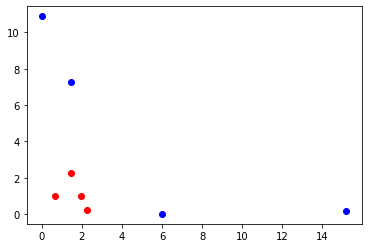

In [34]:
for i in range(8):
    if y[i] == 1:
        plt.scatter(x1[i]**2,x2[i]**2,color = "red")
    else:
        plt.scatter(x1[i]**2,x2[i]**2,color = "blue") 

feature vector : [[x1^2,x2^2,2**0.5*x1*x2]]

x1 = [-0.8,3.9,1.4,0.1,1.2,-2.45,-1.5,1.2]
x2 = [1,0.4,1,-3.3,2.7,0.1,-0.5,-1.5]
y = [1,-1,1,-1,-1,-1,1,1]

In [5]:
check = 0
w = np.array([1,1,1,1],dtype = float)
iterdict = dict()
Iter = 0
while check == 0 :
    check = 1
    for i in range (8):
        new_x = np.array([1,x1[i]**2,x2[i]**2,2**0.5*x1[i]*x2[i]])
        w_sum = w.dot(new_x)
        Iter+=1
        if y[i] * w_sum <=0:
            iterdict[Iter] = []
            check = 0
            w[0] = w[0] + 0.2*y[i]
            iterdict[Iter].append(w[0])
            w[1] = w[1] + 0.2*(x1[i]**2)*y[i]
            iterdict[Iter].append(w[1])
            w[2] = w[2] + 0.2*(x2[i]**2)*y[i]
            iterdict[Iter].append(w[2])
            w[3] = w[3] + 0.2*(2**0.5)*x1[i]*x2[i]*y[i]
            iterdict[Iter].append(w[3])     
print(w)
field_names = ("Iteration No.",'w0','w1','w2','w3')
table = PrettyTable(field_names=field_names)
table.add_row([0,1,1,1,1])
for key,value in iterdict.items():
    table.add_row([key,round(value[0],4),round(value[1],4),round(value[2],4),round(value[3],4)])
print(table)

[ 3.         -0.62       -0.654       0.07793276]
+---------------+-----+---------+--------+---------+
| Iteration No. |  w0 |    w1   |   w2   |    w3   |
+---------------+-----+---------+--------+---------+
|       0       |  1  |    1    |   1    |    1    |
|       2       | 0.8 |  -2.042 | 0.968  |  0.5588 |
|       3       | 1.0 |  -1.65  | 1.168  |  0.9547 |
|       4       | 0.8 |  -1.652 | -1.01  |  1.0481 |
|       7       | 1.0 |  -1.202 | -0.96  |  1.2602 |
|       8       | 1.2 |  -0.914 | -0.51  |  0.7511 |
|       9       | 1.4 |  -0.786 | -0.31  |  0.5248 |
|       13      | 1.2 |  -1.074 | -1.768 | -0.3916 |
|       15      | 1.4 |  -0.624 | -1.718 | -0.1795 |
|       16      | 1.6 |  -0.336 | -1.268 | -0.6886 |
|       19      | 1.8 |  0.056  | -1.068 | -0.2926 |
|       22      | 1.6 | -1.1445 | -1.07  | -0.2233 |
|       23      | 1.8 | -0.6945 | -1.02  | -0.0112 |
|       24      | 2.0 | -0.4065 | -0.57  | -0.5203 |
|       27      | 2.2 | -0.0145 | -0.37  | -0.124

In [88]:
final_w = []
for i in range (8):
        new_x = np.array([1,x1[i]**2,x2[i]**2,2**0.5*x1[i]*x2[i]])
        w_sum = w.dot(new_x)
        final_w.append(w_sum)
field_names = ("xi",'φ(xi)','yiφ^T*(xi)w*')
table = PrettyTable(field_names=field_names)
for i in range(8):
    y_final = final_w[i]*y[i]
    table.add_row([('(%s,%s)'%(x1[i],x2[i])),('(%f,%f,%f)'%(x1[i]**2,x2[i]**2,2**0.5*x1[i]*x1[i])),round(y_final,4)])
print(table)

+-------------+--------------------------------+--------------+
|      xi     |             φ(xi)              | yiφ^T*(xi)w* |
+-------------+--------------------------------+--------------+
|   (-0.8,1)  |  (0.640000,1.000000,0.905097)  |     0.0      |
|  (3.9,0.4)  | (15.210000,0.160000,21.510188) |   -6.3629    |
|   (1.4,1)   |  (1.960000,1.000000,2.771859)  |    1.2851    |
|  (0.1,-3.3) | (0.010000,10.890000,0.014142)  |     -0.0     |
|  (1.2,2.7)  |  (1.440000,7.290000,2.036468)  |     -0.0     |
| (-2.45,0.1) |  (6.002500,0.010000,8.488817)  |   -0.7551    |
| (-1.5,-0.5) |  (2.250000,0.250000,3.181981)  |     0.0      |
|  (1.2,-1.5) |  (1.440000,2.250000,2.036468)  |     0.0      |
+-------------+--------------------------------+--------------+


In [ ]:
import math

